1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [11]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

# Define the number of particles and the spatial step size
N = 100
l = 1

# Define the initial positions and velocities of the particles
# Assume that the particles are equally spaced and have equal initial velocities
x0 = np.linspace(0, (N - 1) * l, N)
#v0 = np.ones(N)
v0 = npr.normal(loc=0.0, scale=1.0, size=N-2)
# Define the FPU model parameters
k = 1  # Spring constant
m = 1  # Mass of each particle

# Define the time step size and the total simulation time
dt = 0.01
t_total = 100

# Define the equations of motion for the FPU model
# These equations describe how the positions and velocities of the particles evolve over time
def fpu_model(x, v, k, m):
    # Compute the forces acting on each particle
    forces = -k * (x[1:] - x[:-1]) + k * (x[1:] - x[:-1])

    # Compute the accelerations of each particle
    a = forces / m

    # Use the equations of motion to update the positions and velocities of the particles
    x_next = x[1:N-1] + v * dt
    v_next = v + a[1:N-1] * dt

    return x_next, v_next

# Initialize the positions and velocities of the particles
x = x0
v = v0

# Initialize the arrays for storing the normal mode amplitudes at each time step
a = np.zeros((t_total, N))
b = np.zeros((t_total, N))

# Loop over the simulation time, using the equations of motion to update the positions and velocities of the particles at each time step
for t in range(t_total):
    # Use the Euler method to approximate the evolution of the system
    x_next[1:N-1], v_next = fpu_model(x, v, k, m)

    # Update the positions and velocities of the particles
    x = x_next
    v = v_next

    # Compute the normal mode decomposition of the FPU model at this time step
    a[t, :], b[t, :] = normal_mode_decomposition(x, v, k, m)

# Compute the contributions of the first 7 normal modes at each time step
contributions = np.abs(a[:, :7])**2 + np.abs(b[:, :7])**2

# Plot the contributions of the first 7 normal modes at each time step
plt.figure()
for i in range(7):
    plt.plot(contributions[:, i], label="Normal mode %d" % (i + 1))
plt.xlabel("Time step")
plt.ylabel("Contribution")
plt.legend()
plt.show()


NameError: name 'x_next' is not defined

TypeError: only integer scalar arrays can be converted to a scalar index

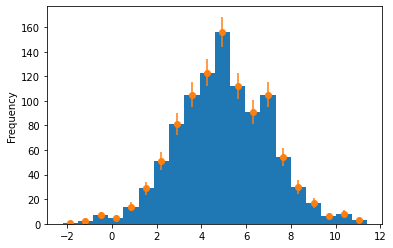

In [2]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import trapz
import matplotlib.pyplot as plt

mean = 5
std = 2

N = 1000
x = np.random.normal(mean, std, N)

plt.hist(x, bins=20, label="Histogram of x")
plt.ylabel("Frequency")

hist, bins = np.histogram(x, bins=20)
errors = np.sqrt(hist)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.errorbar(bin_centers, hist, yerr=errors, fmt="o", label="Histogram with Poisson uncertainty")

std_default = 1.06 * x.std() * x.size ** (-1/5)

kde = np.zeros_like(x)
for i in range(bins):
    for j in range(bins):
        kde[i] += norm.pdf(x[j], loc=x[j], scale=std_default)

plt.plot(x, kde, label="KDE")

area_kde = trapz(kde, x)
area_hist = trapz(hist, bin_centers)

kde /= area_kde / area_hist

plt.plot(x, kde, label="Normalized KDE")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import numpy.random as npr
from scipy.stats import norm

In [ ]:
N = 1000
a = npr.normal(loc=0.0, scale=1.0, size=N)
rosino = 'plum'

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
b = ax1.hist(a, bins= N//20,label='x', color=rosino)
bincent = (b[1][:-1]+b[1][1:])/2
ax1.errorbar(bincent, b[0], yerr=b[0]**0.5, ecolor='indigo', elinewidth=2, capsize=4, linewidth=0)
ax1.set_xlabel('$Value$')
ax1.set_ylabel('$Counts$')

In [ ]:
dev = 1.06 * a.std() * a.size**(-1/5)
gaus = norm.pdf(0, a, dev)
sm = np.sum(gaus)
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
#b = ax2.plot(gaus)
#ax2.plot(sm)

In [ ]:
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
std = 2
gaus = []
for i in a:
    gaus.append(norm(i,std))
    
xrange = np.linspace(-10,10,1000)
for n in gaus:
    ax2.plot(xrange, n.pdf(xrange))
    
f_x = np.zeros((N,N))
for i in range (N):
    

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot